In [16]:
import pandas as pd 
import matplotlib.pyplot as plt 
from datetime import datetime 
import numpy as np

In [2]:
df = pd.read_csv("WHO COVID-19 cases.csv")

In [3]:
df.head()

,Date_reported,Country_code,Country,Continent,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
1,2020-01-12,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
2,2020-01-19,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
3,2020-01-26,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
4,2020-02-02,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58560 entries, 0 to 58559
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      58560 non-null  object 
 1   Country_code       58316 non-null  object 
 2   Country            58560 non-null  object 
 3   Continent          58560 non-null  object 
 4   WHO_region         54168 non-null  object 
 5   New_cases          39260 non-null  float64
 6   Cumulative_cases   58560 non-null  int64  
 7   New_deaths         25084 non-null  float64
 8   Cumulative_deaths  58560 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 4.0+ MB


In [28]:
## Linear Regression from scratch 
import numpy as np 

class LinearRegression:
    def __init__(self):
        self.weights = None
        self.bias = None

    def _initialize_parameters(self, n_features):
        """Initialize weights and bias."""
        self.weights = np.zeros(n_features)
        self.bias = 0

    def cost_function(self, X, y, m):
        """Compute the mean squared error cost."""
        predictions = np.dot(X, self.weights) + self.bias  # Fixed typo here
        cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
        return cost

    def compute_gradients(self, X, y, m):
        """Compute gradients for weights and bias."""
        predictions = np.dot(X, self.weights) + self.bias
        dw = (1 / m) * np.dot(X.T, (predictions - y))
        db = (1 / m) * np.sum(predictions - y)
        return dw, db

    def fit(self, X, y, learning_rate=0.01, n_iterations=1000):
        """Train the linear regression model using gradient descent."""
        m, n = X.shape
        self._initialize_parameters(n)

        for i in range(n_iterations):
            # Compute gradients
            dw, db = self.compute_gradients(X, y, m)

            # Update parameters
            self.weights -= learning_rate * dw
            self.bias -= learning_rate * db

            # Compute and print cost every 100 iterations
            if i % 100 == 0:
                cost = self.cost_function(X, y, m)
                print(f"Iteration {i}: Cost = {cost}")

    def predict(self, X):
        """Make predictions using the trained model."""
        return np.dot(X, self.weights) + self.bias



In [29]:
# Let's convert Date_reported to datetime and calculate days since first case 
df['Date_reported'] = pd.to_datetime(df['Date_reported'])
df['Days_since_first_report'] = (df['Date_reported'] - df['Date_reported'].min()).dt.days

# Fill nan values with 0 
df['New_cases'] = df['New_cases'].fillna(0)

X = df[['Days_since_first_report', 'New_cases']].values 
y = df['Cumulative_cases'].values

In [32]:
model = LinearRegression()
model.fit(X, y, learning_rate = 0.000001, n_iterations = 1000)

Iteration 0: Cost = 2.3023350948569193e+21
Iteration 100: Cost = nan
Iteration 200: Cost = nan


/home/sameer/miniforge3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Iteration 300: Cost = nan
Iteration 400: Cost = nan
Iteration 500: Cost = nan
Iteration 600: Cost = nan
Iteration 700: Cost = nan
Iteration 800: Cost = nan
Iteration 900: Cost = nan


In [33]:
y_pred = model.predict(X)

In [34]:
y_mean = np.mean(y)
ss_tot = np.sum((y - y_mean) ** 2)
ss_res = np.sum((y - y_pred) ** 2)
r_squared = 1 - (ss_res / ss_tot)

print(f"R-squared: {r_squared}")
print(f"Weights: {model.weights}")
print(f"Bias: {model.bias}")

days_in_future = 30 
last_new_cases = df['New_cases'].iloc[-1]
future_X = np.array([[df['Days_since_first_report'].max() + days_in_future, last_new_cases]])
future_prediction = model.predict(future_X)

R-squared: nan
Weights: [nan nan]
Bias: nan


In [36]:
print(f"Predicted cumulative cases {days_in_future} days in the future: {future_prediction[0]}")

Predicted cumulative cases 30 days in the future: nan


Iteration 0: Cost = 2.3023350948569193e+21
Iteration 100: Cost = nan


/home/sameer/miniforge3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Iteration 200: Cost = nan
Iteration 300: Cost = nan
Iteration 400: Cost = nan
Iteration 500: Cost = nan
Iteration 600: Cost = nan
Iteration 700: Cost = nan
Iteration 800: Cost = nan
Iteration 900: Cost = nan
R-squared: nan
Weights: [nan nan]
Bias: nan


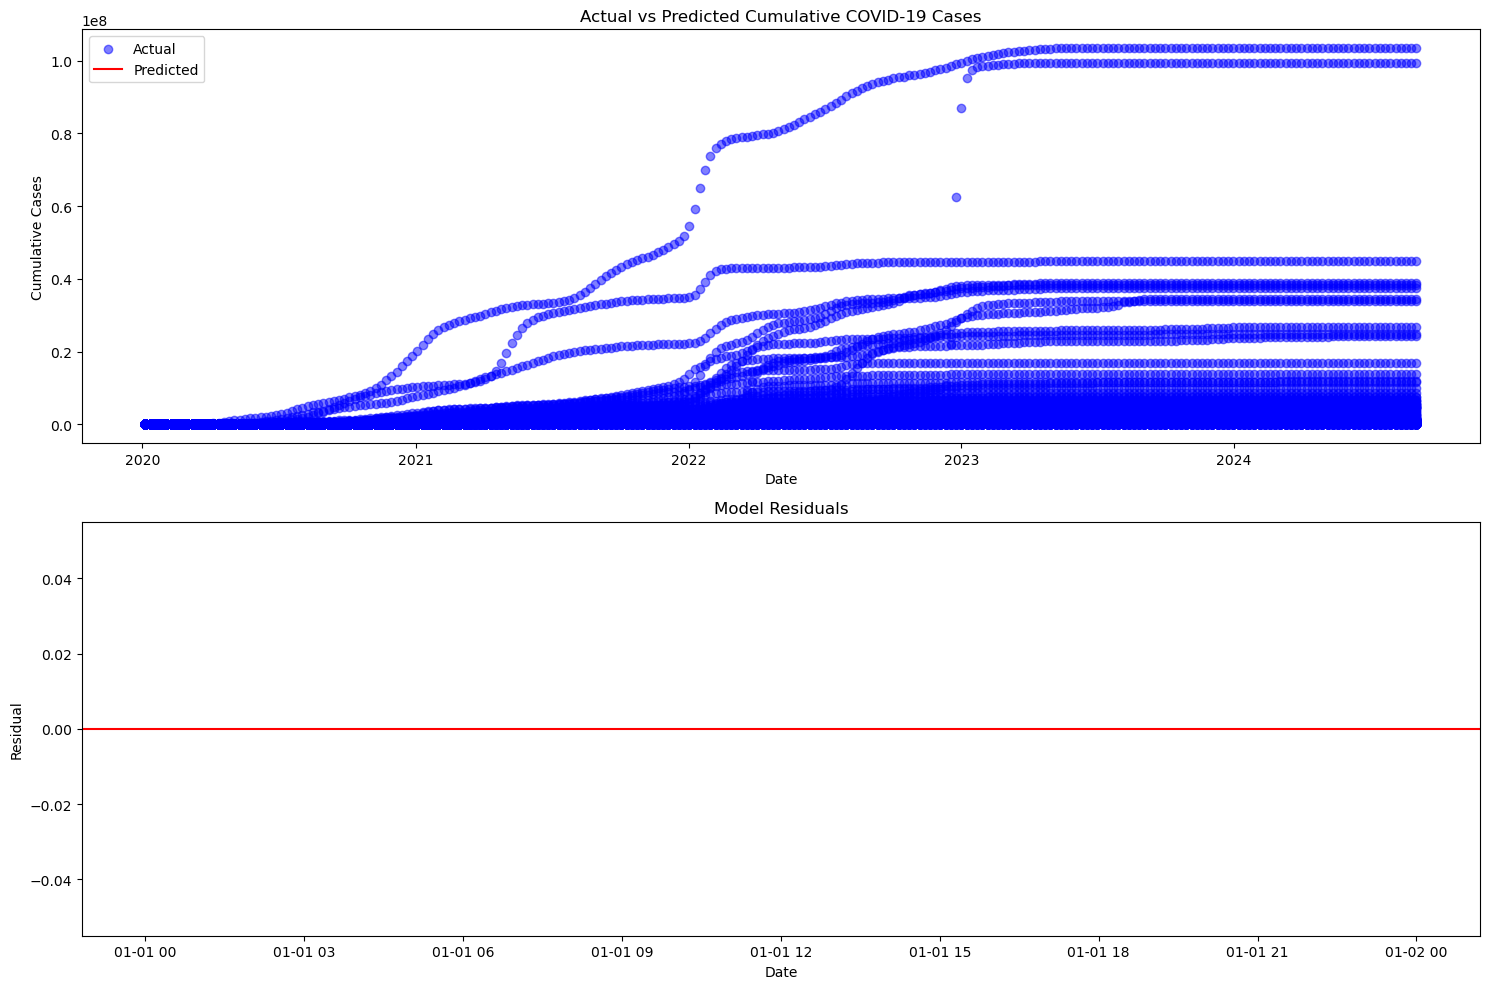

Predicted cumulative cases 30 days in the future: nan


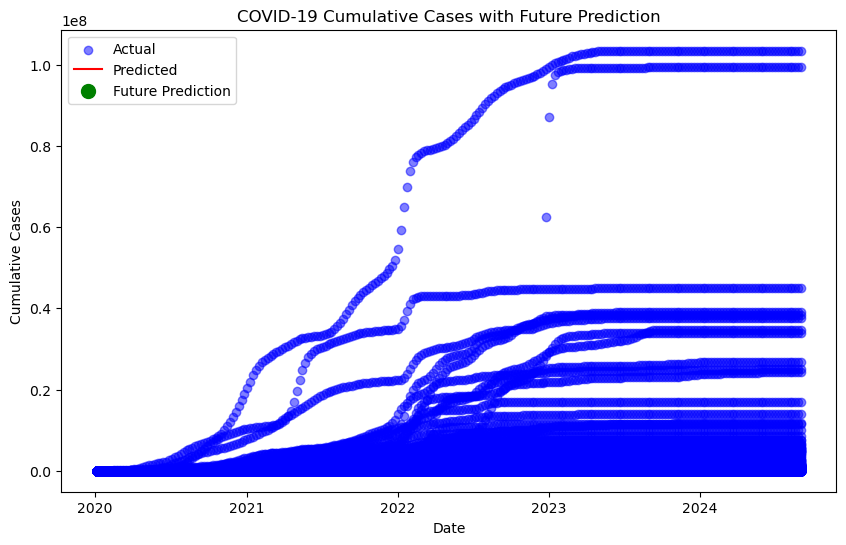

In [38]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# Assuming the LinearRegression class from the previous artifact is available
# If not, you would need to include it here

# Load the data
df = pd.read_csv('WHO COVID-19 cases.csv')  # Replace with your actual file path

# Convert Date_reported to datetime and calculate days since first report
df['Date_reported'] = pd.to_datetime(df['Date_reported'])
df['Days_since_first_report'] = (df['Date_reported'] - df['Date_reported'].min()).dt.days

# Fill NaN values in New_cases with 0 (assuming no new cases were reported)
df['New_cases'] = df['New_cases'].fillna(0)

# Prepare the feature matrix X and target variable y
X = df[['Days_since_first_report', 'New_cases']].values
y = df['Cumulative_cases'].values

# Initialize and train the model
model = LinearRegression()
model.fit(X, y, learning_rate=0.000001, n_iterations=1000)

# Make predictions
y_pred = model.predict(X)

# Calculate R-squared
y_mean = np.mean(y)
ss_tot = np.sum((y - y_mean) ** 2)
ss_res = np.sum((y - y_pred) ** 2)
r_squared = 1 - (ss_res / ss_tot)

print(f"R-squared: {r_squared}")
print(f"Weights: {model.weights}")
print(f"Bias: {model.bias}")

# Create visualizations
plt.figure(figsize=(15, 10))

# Plot 1: Actual vs Predicted Cumulative Cases
plt.subplot(2, 1, 1)
plt.scatter(df['Date_reported'], y, color='blue', alpha=0.5, label='Actual')
plt.plot(df['Date_reported'], y_pred, color='red', label='Predicted')
plt.title('Actual vs Predicted Cumulative COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('Cumulative Cases')
plt.legend()

# Plot 2: Model Residuals
plt.subplot(2, 1, 2)
residuals = y - y_pred
plt.scatter(df['Date_reported'], residuals, color='green', alpha=0.5)
plt.title('Model Residuals')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.axhline(y=0, color='r', linestyle='-')

plt.tight_layout()
plt.show()

# Example prediction for a future date
days_in_future = 30
last_new_cases = df['New_cases'].iloc[-1]
future_X = np.array([[df['Days_since_first_report'].max() + days_in_future, last_new_cases]])
future_prediction = model.predict(future_X)

print(f"Predicted cumulative cases {days_in_future} days in the future: {future_prediction[0]}")

# Visualization for future prediction
plt.figure(figsize=(10, 6))
plt.scatter(df['Date_reported'], y, color='blue', alpha=0.5, label='Actual')
plt.plot(df['Date_reported'], y_pred, color='red', label='Predicted')

future_date = df['Date_reported'].max() + pd.Timedelta(days=days_in_future)
plt.scatter(future_date, future_prediction, color='green', s=100, label='Future Prediction')

plt.title('COVID-19 Cumulative Cases with Future Prediction')
plt.xlabel('Date')
plt.ylabel('Cumulative Cases')
plt.legend()
plt.show()